### Importación de datos



In [44]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [45]:
'''pip install matplotlib'''


'pip install matplotlib'

In [46]:
import matplotlib.pyplot as plt
import numpy as np

#1. Análisis de facturación




Calculamos la facturación de cada tienda, así como el ingreso total

La facturación de la tienda 1 es de: $1,150,880,400.00
La facturación de la tienda 2 es de: $1,116,343,500.00
La facturación de la tienda 3 es de: $1,098,019,600.00
La facturación de la tienda 4 es de: $1,038,375,700.00



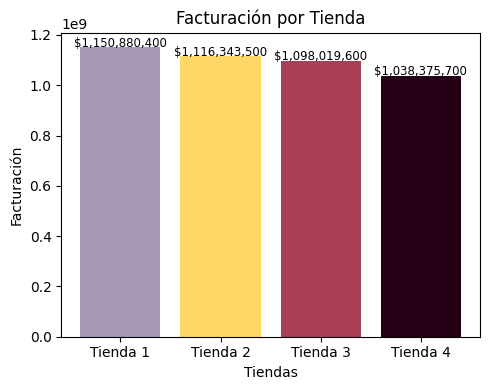


La facturación total de las tiendas es de: $4,403,619,200.00


In [47]:
print (f'\nCalculamos la facturación de cada tienda, así como el ingreso total')

tienda['Precio'].sum()
print (f'\nLa facturación de la tienda 1 es de: ${tienda["Precio"].sum():,.2f}')
tienda2['Precio'].sum()
print (f'La facturación de la tienda 2 es de: ${tienda2["Precio"].sum():,.2f}')
tienda3['Precio'].sum()
print (f'La facturación de la tienda 3 es de: ${tienda3["Precio"].sum():,.2f}')
tienda4['Precio'].sum()
print (f'La facturación de la tienda 4 es de: ${tienda4["Precio"].sum():,.2f}')
total_precio_tienda = tienda['Precio'].sum() + tienda2['Precio'].sum() + tienda3['Precio'].sum() + tienda4['Precio'].sum()

print()

# Ahora vamos a colocar una gráfica que nos ayude a visualizar las ventas de forma más eficaz #

valores = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#A599B5', '#FED766', '#A93F55', '#240115']

plt.figure(figsize=(5, 4))
plt.bar(nombres, valores, color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por Tienda')

# Mostrar el valor encima de cada barra
for i, valor in enumerate(valores):
    plt.text(i, valor + 1e6, f"${valor:,.0f}", ha='center', fontsize=8.5)

plt.tight_layout()
plt.show()

print (f'\nLa facturación total de las tiendas es de: ${total_precio_tienda:,.2f}')

# 2. Ventas por categoría

In [48]:
import csv
from urllib.request import urlopen

urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

#Diccionario para almacenar ventas por categoría para cada tienda.
ventas_por_tienda_categoria = {}

# Procesar todas las tiendas
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    tienda_nombre = f"Tienda {i+1}"
    print(f"\nVentas por categoría en {tienda_nombre}:")

    # Diccionario para la tienda actual.
    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        # Añadir al diccionario de la tienda actual.
        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

    # Almacene los resultados de esta tienda en el diccionario principal
    ventas_por_tienda_categoria[tienda_nombre] = categorias_tienda

    # Mostrar resultados para esta tienda
    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:,.2f}")

# Mostrar resultados totales
print("\nVentas totales por categoría (all stores):")
ventas_totales_categoria = {}
for tienda_nombre, categorias in ventas_por_tienda_categoria.items():
    for categoria, monto in categorias.items():
        if categoria in ventas_totales_categoria:
            ventas_totales_categoria[categoria] += monto
        else:
            ventas_totales_categoria[categoria] = monto

for categoria, monto in ventas_totales_categoria.items():
    print(f"  {categoria}: ${monto:,.2f}")

# Calcular el total general
total_general = sum(ventas_totales_categoria.values())
print(f"\nTotal general de ventas: ${total_general:,.2f}")


Ventas por categoría en Tienda 1:
  Electrónicos: $1,290,390,700.00
  Muebles: $582,928,200.00
  Juguetes: $49,062,800.00
  Electrodomésticos: $1,032,375,600.00
  Artículos para el hogar: $38,316,800.00
  Deportes y diversión: $126,883,700.00
  Libros: $25,769,400.00
  Instrumentos musicales: $276,990,500.00

Ventas por categoría en Tienda 2:
  Muebles: $527,332,100.00
  Instrumentos musicales: $294,448,700.00
  Deportes y diversión: $81,660,600.00
  Electrónicos: $1,286,643,600.00
  Artículos para el hogar: $42,739,700.00
  Juguetes: $46,721,200.00
  Electrodomésticos: $1,026,226,300.00
  Libros: $31,417,000.00

Ventas por categoría en Tienda 3:
  Electrodomésticos: $1,081,380,800.00
  Muebles: $555,092,500.00
  Instrumentos musicales: $250,336,000.00
  Deportes y diversión: $123,399,200.00
  Electrónicos: $1,101,334,500.00
  Juguetes: $61,190,400.00
  Artículos para el hogar: $44,724,600.00
  Libros: $26,358,900.00

Ventas por categoría en Tienda 4:
  Electrodomésticos: $879,089,600

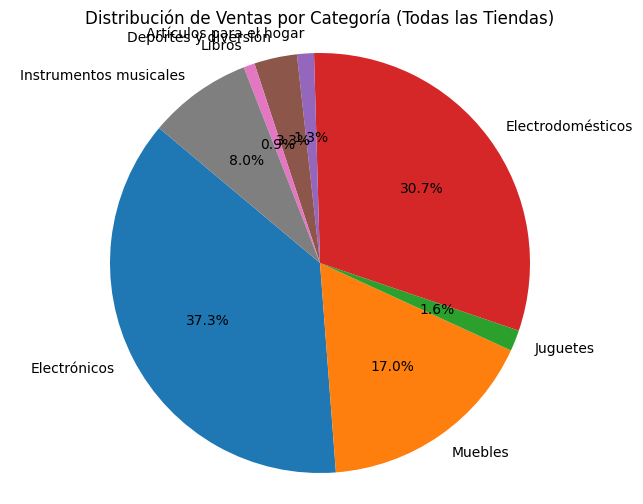

Electrónicos: $4,889,815,300.00
Muebles: $2,221,980,800.00
Juguetes: $211,615,600.00
Electrodomésticos: $4,019,072,300.00
Artículos para el hogar: $170,360,400.00
Deportes y diversión: $432,005,500.00
Libros: $113,088,700.00
Instrumentos musicales: $1,044,612,400.00


In [49]:
import matplotlib.pyplot as plt

# Crear gráfico de pastel de ventas por categoría
categorias = list(ventas_totales_categoria.keys())
montos = list(ventas_totales_categoria.values())

plt.figure(figsize=(8, 6))
plt.pie(montos, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por Categoría (Todas las Tiendas)')
plt.axis('equal')  # Mantener forma circular
plt.show()

# Imprimir las ventas totales por categoría
for categoria, monto in ventas_totales_categoria.items():
    print(f"{categoria}: ${monto:,.2f}")


In [50]:
print(f"{categoria}: ${monto:,.2f}")

Instrumentos musicales: $1,044,612,400.00


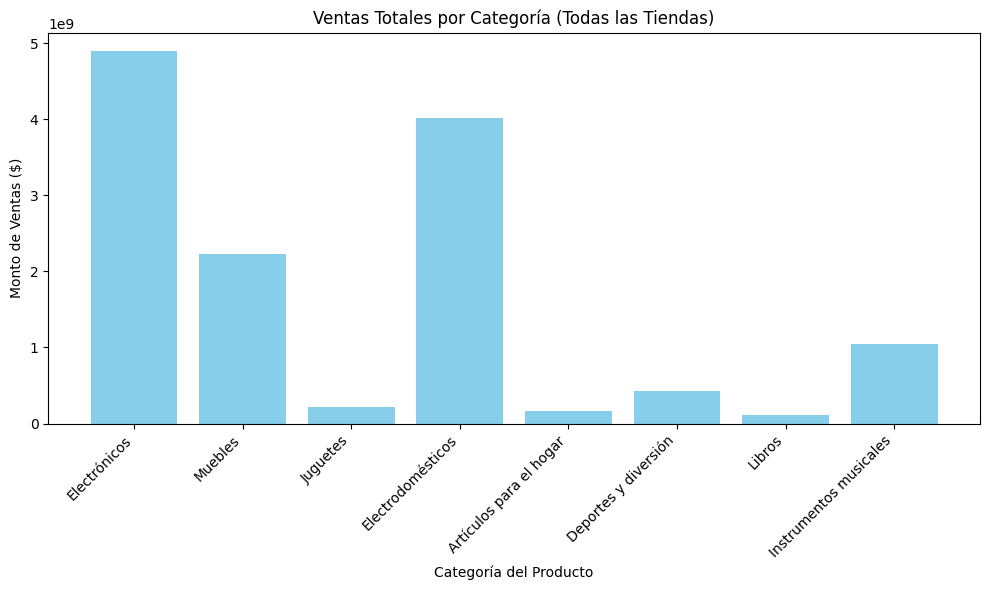

In [51]:
import matplotlib.pyplot as plt

# Extraer categorías y montos
categorias = list(ventas_totales_categoria.keys())
montos = list(ventas_totales_categoria.values())

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorias, montos, color='skyblue')
plt.title('Ventas Totales por Categoría (Todas las Tiendas)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Monto de Ventas ($)')
plt.xticks(rotation=45, ha='right')  # Rota etiquetas si son largas
plt.tight_layout()
plt.show()


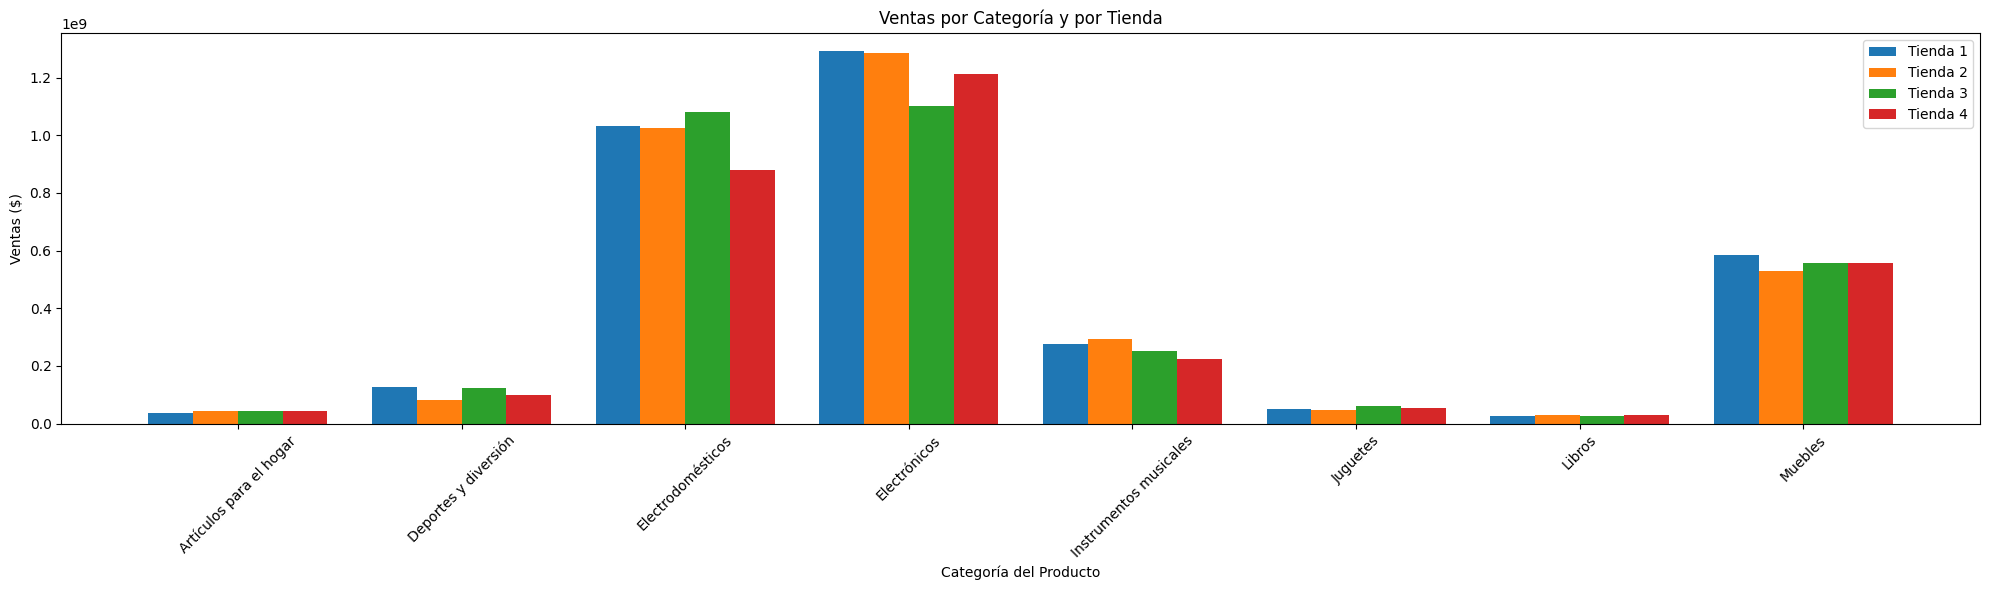

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener todas las categorías posibles
todas_categorias = set()
for tienda in ventas_por_tienda_categoria.values():
    todas_categorias.update(tienda.keys())
todas_categorias = sorted(todas_categorias)

# Preparar datos
tiendas = list(ventas_por_tienda_categoria.keys())
valores = []

for tienda in tiendas:
    ventas = []
    for categoria in todas_categorias:
        monto = ventas_por_tienda_categoria[tienda].get(categoria, 0)
        ventas.append(monto)
    valores.append(ventas)

# Convertimos a numpy array para facilitar la gráfica
valores = np.array(valores)

# Parámetros para barras
bar_width = 0.2
x = np.arange(len(todas_categorias))

# Crear gráfico
plt.figure(figsize=(20, 6))
for i, tienda in enumerate(tiendas):
    plt.bar(x + i * bar_width, valores[i], width=bar_width, label=tienda)

# Ejes y leyendas
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas ($)')
plt.title('Ventas por Categoría y por Tienda')
plt.xticks(x + bar_width * (len(tiendas)-1) / 2, todas_categorias, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


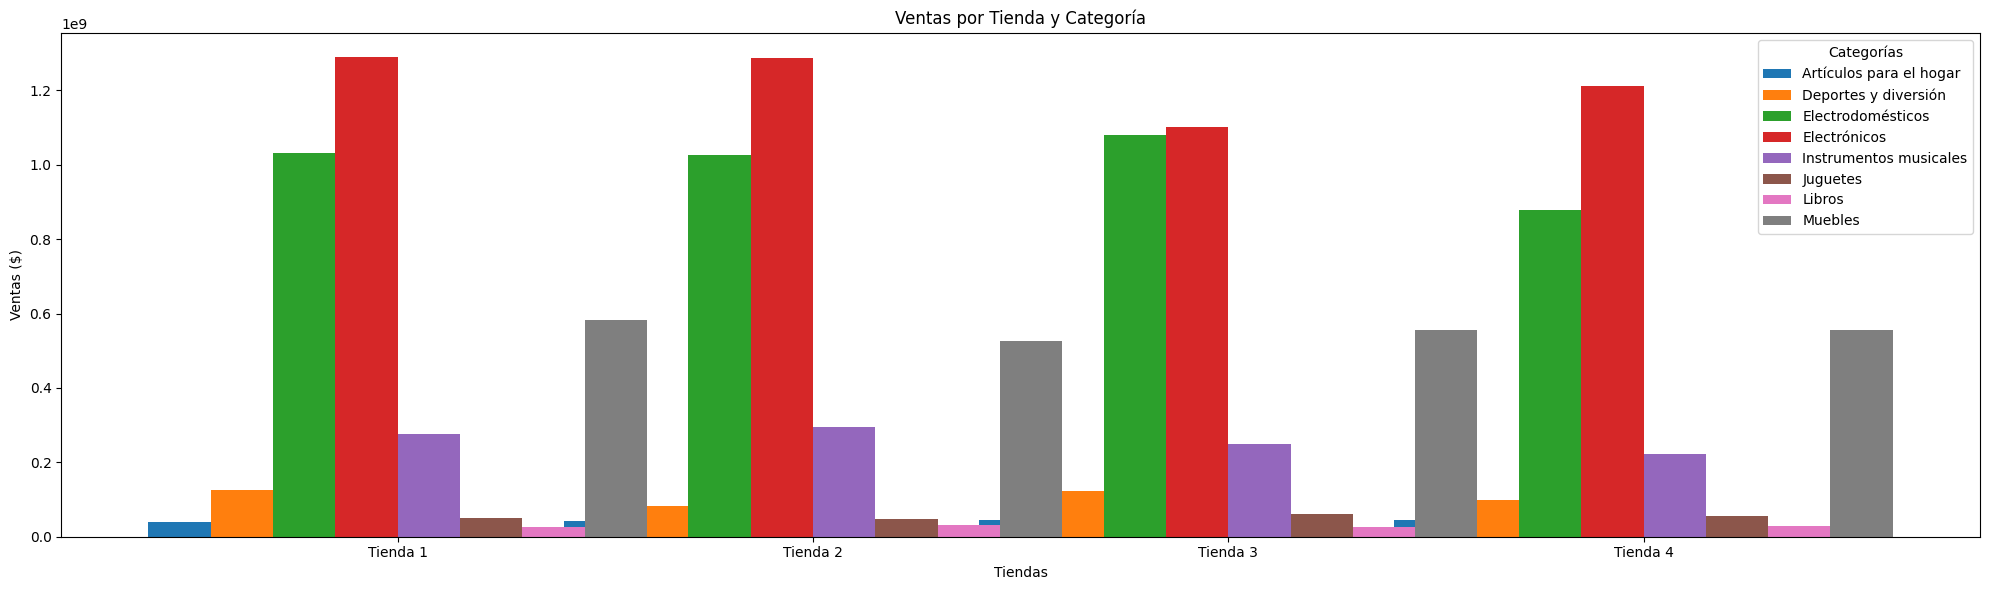

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener nombres de tiendas y categorías
tiendas = list(ventas_por_tienda_categoria.keys())

# Obtener todas las categorías únicas
todas_categorias = set()
for categorias in ventas_por_tienda_categoria.values():
    todas_categorias.update(categorias.keys())
todas_categorias = sorted(todas_categorias)

# Crear estructura de datos: filas = categorías, columnas = tiendas
valores_categoria = []
for categoria in todas_categorias:
    fila = []
    for tienda in tiendas:
        monto = ventas_por_tienda_categoria[tienda].get(categoria, 0)
        fila.append(monto)
    valores_categoria.append(fila)

valores_categoria = np.array(valores_categoria)

# Configuración del gráfico
bar_width = 0.15
x = np.arange(len(tiendas))

plt.figure(figsize=(20, 6))
for i, categoria in enumerate(todas_categorias):
    plt.bar(x + i * bar_width, valores_categoria[i], width=bar_width, label=categoria)

plt.xlabel('Tiendas')
plt.ylabel('Ventas ($)')
plt.title('Ventas por Tienda y Categoría')
plt.xticks(x + bar_width * (len(todas_categorias)-1)/2, tiendas, rotation=0)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [54]:
calificaciones_promedio = {}

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    tienda_nombre = f"Tienda {i+1}"

    total_calificacion = 0
    cantidad = 0

    for venta in datos_tienda:
        if venta['Calificación']:
            try:
                calificacion = float(venta['Calificación'])
                total_calificacion += calificacion
                cantidad += 1
            except:
                continue

    promedio = total_calificacion / cantidad if cantidad > 0 else 0
    calificaciones_promedio[tienda_nombre] = promedio


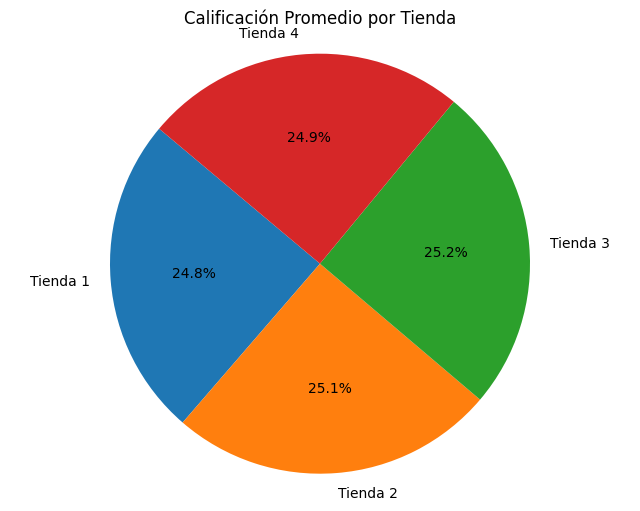

In [55]:
import matplotlib.pyplot as plt

# Datos
labels = list(calificaciones_promedio.keys())
valores = list(calificaciones_promedio.values())

# Gráfico
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Calificación Promedio por Tienda')
plt.axis('equal')  # Hace el pastel redondo
plt.show()


In [56]:
import pandas as pd

# Convertir el diccionario en DataFrame
df_calificaciones = pd.DataFrame.from_dict(
    calificaciones_promedio,
    orient='index',
    columns=['Calificación Promedio']
)

# Opcional: ordenar de mayor a menor
df_calificaciones = df_calificaciones.sort_values(by='Calificación Promedio', ascending=False)

# Mostrar la tabla
display(df_calificaciones)


,Calificación Promedio
Tienda 3,4.048326
Tienda 2,4.037304
Tienda 4,3.995759
Tienda 1,3.976685


# 4. Productos más y menos vendidos

In [57]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Reiniciamos el contador global
ventas_por_producto = defaultdict(int)

# Recorremos cada tienda
for url in urls:
    datos_tienda = leer_csv(url)
    for venta in datos_tienda:
        producto = venta['Producto']
        cantidad = int(venta['Cantidad de cuotas'])  # Aquí asumimos que es la cantidad vendida
        ventas_por_producto[producto] += cantidad

# Convertimos a DataFrame para manipular
df_ventas_productos = pd.DataFrame(list(ventas_por_producto.items()), columns=['Producto', 'Cantidad Vendida'])

# Ordenamos
df_ventas_productos = df_ventas_productos.sort_values(by='Cantidad Vendida', ascending=False)

# Seleccionamos los más y menos vendidos
top_10_mas_vendidos = df_ventas_productos.head(10)
top_10_menos_vendidos = df_ventas_productos.tail(10)

# Mostrar los resultados
print("Los 10 productos más vendidos:")
display(top_10_mas_vendidos)

print("\nLos 10 productos menos vendidos:")
display(top_10_menos_vendidos)

Los 10 productos más vendidos:


,Producto,Cantidad Vendida
32,Secadora de ropa,649
28,Mesa de noche,627
50,Pandereta,625
13,Bicicleta,614
38,Iphone 15,611
48,Cama king,603
22,Set de ollas,601
3,Microondas,600
43,Guitarra acústica,595
23,Batería,595



Los 10 productos menos vendidos:


,Producto,Cantidad Vendida
34,Tablet ABXY,497
31,Guitarra eléctrica,497
35,Cubo mágico 8x8,487
6,Muñeca bebé,474
39,Mochila,471
47,Mesa de centro,469
30,Dinosaurio Rex,458
45,Celular ABXY,447
36,Set de vasos,435
46,Smartwatch,432


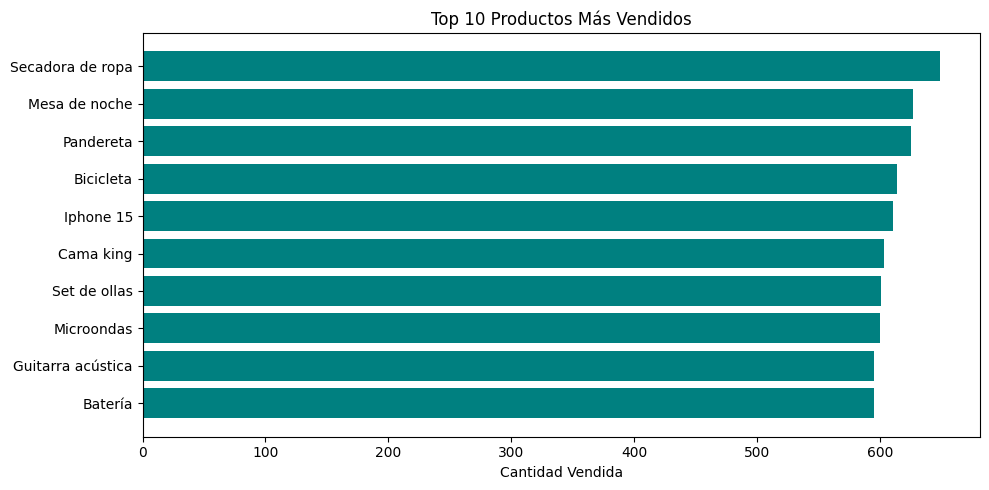

In [58]:
plt.figure(figsize=(10, 5))
plt.barh(top_10_mas_vendidos['Producto'], top_10_mas_vendidos['Cantidad Vendida'], color='teal')
plt.xlabel('Cantidad Vendida')
plt.title('Top 10 Productos Más Vendidos')
plt.gca().invert_yaxis()  # Para que el más vendido quede arriba
plt.tight_layout()
plt.show()


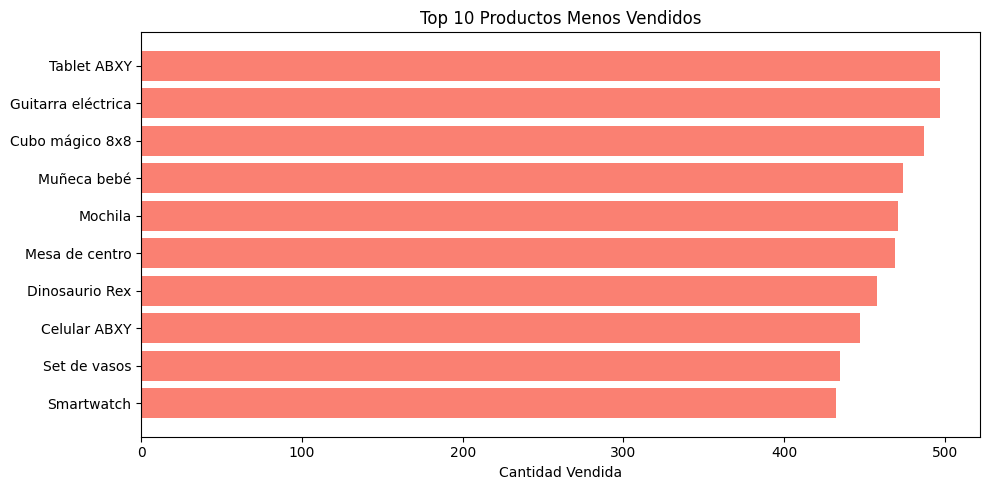

In [59]:
plt.figure(figsize=(10, 5))
plt.barh(top_10_menos_vendidos['Producto'], top_10_menos_vendidos['Cantidad Vendida'], color='salmon')
plt.xlabel('Cantidad Vendida')
plt.title('Top 10 Productos Menos Vendidos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


/tmp/ipython-input-2597304608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_mas_vendidos['Tipo'] = 'Más vendidos'
/tmp/ipython-input-2597304608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_menos_vendidos['Tipo'] = 'Menos vendidos'


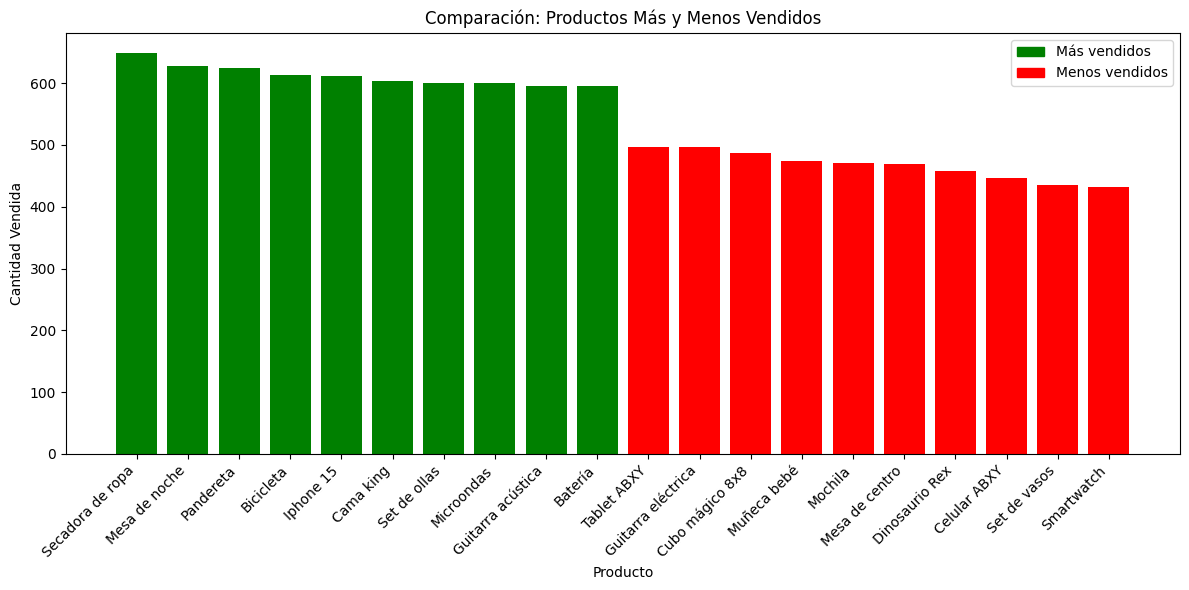

In [60]:
import matplotlib.pyplot as plt

# Unimos ambos DataFrames
top_10_mas_vendidos['Tipo'] = 'Más vendidos'
top_10_menos_vendidos['Tipo'] = 'Menos vendidos'

productos_combinados = pd.concat([top_10_mas_vendidos, top_10_menos_vendidos])

# Ordenar por cantidad para mejor visualización
productos_combinados = productos_combinados.sort_values(by='Cantidad Vendida', ascending=False)

# Crear gráfica
plt.figure(figsize=(12, 6))
colores = ['green' if tipo == 'Más vendidos' else 'red' for tipo in productos_combinados['Tipo']]

plt.bar(productos_combinados['Producto'], productos_combinados['Cantidad Vendida'], color=colores)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Comparación: Productos Más y Menos Vendidos')
plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color='green', label='Más vendidos'),
    plt.Rectangle((0, 0), 1, 1, color='red', label='Menos vendidos')
])
plt.tight_layout()
plt.show()


In [61]:
# Filtrar los productos top (más y menos vendidos)
productos_top = list(top_10_mas_vendidos['Producto']) + list(top_10_menos_vendidos['Producto'])

# Crear estructura para almacenar cantidades por tienda
ventas_productos_tienda = {producto: [0, 0, 0, 0] for producto in productos_top}

# Recontar ventas por tienda
for idx, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    for venta in datos_tienda:
        producto = venta['Producto']
        if producto in productos_top:
            cantidad = int(venta['Cantidad de cuotas'])
            ventas_productos_tienda[producto][idx] += cantidad


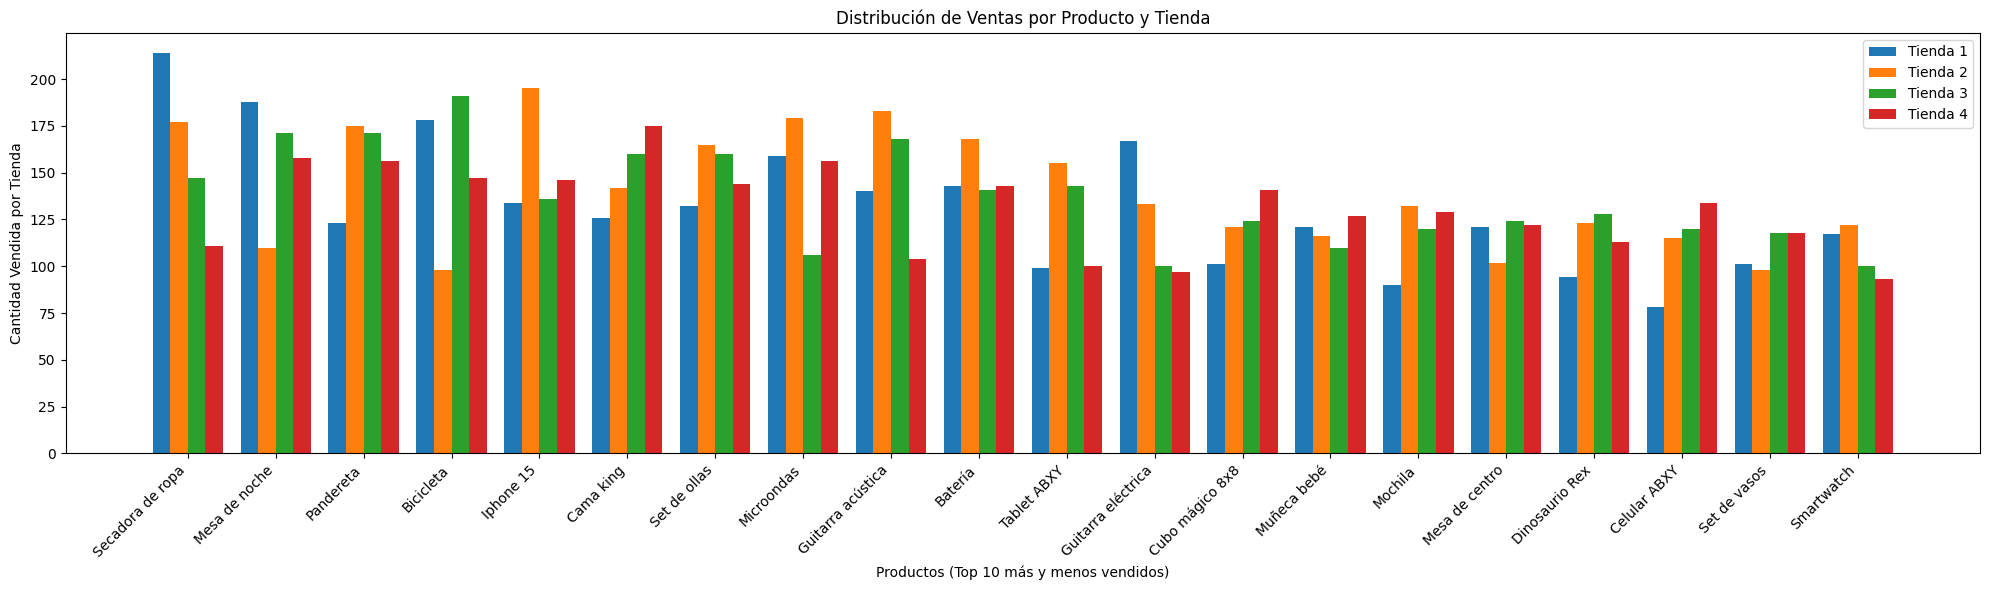

In [69]:
import numpy as np
import matplotlib.pyplot as plt

productos = list(ventas_productos_tienda.keys())
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
datos = np.array(list(ventas_productos_tienda.values()))

# Definir posiciones
x = np.arange(len(productos))
ancho = 0.2

# Crear figura
plt.figure(figsize=(20, 6))

for i in range(4):  # 4 tiendas
    plt.bar(x + i*ancho, datos[:, i], width=ancho, label=tiendas[i])

# Configuración del gráfico
plt.xticks(x + ancho * 1.5, productos, rotation=45, ha='right')
plt.xlabel('Productos (Top 10 más y menos vendidos)')
plt.ylabel('Cantidad Vendida por Tienda')
plt.title('Distribución de Ventas por Producto y Tienda')
plt.legend()
plt.tight_layout()
plt.show()


In [63]:


producto_max = top_10_mas_vendidos.iloc[0]['Producto']
producto_min = top_10_menos_vendidos.iloc[0]['Producto']


In [64]:
# Diccionarios para almacenar cantidades
ventas_max = [0, 0, 0, 0]  # Para producto más vendido
ventas_min = [0, 0, 0, 0]  # Para producto menos vendido

# Recorremos las tiendas
for idx, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    for venta in datos_tienda:
        producto = venta['Producto']
        cantidad = int(venta['Cantidad de cuotas'])
        if producto == producto_max:
            ventas_max[idx] += cantidad
        elif producto == producto_min:
            ventas_min[idx] += cantidad


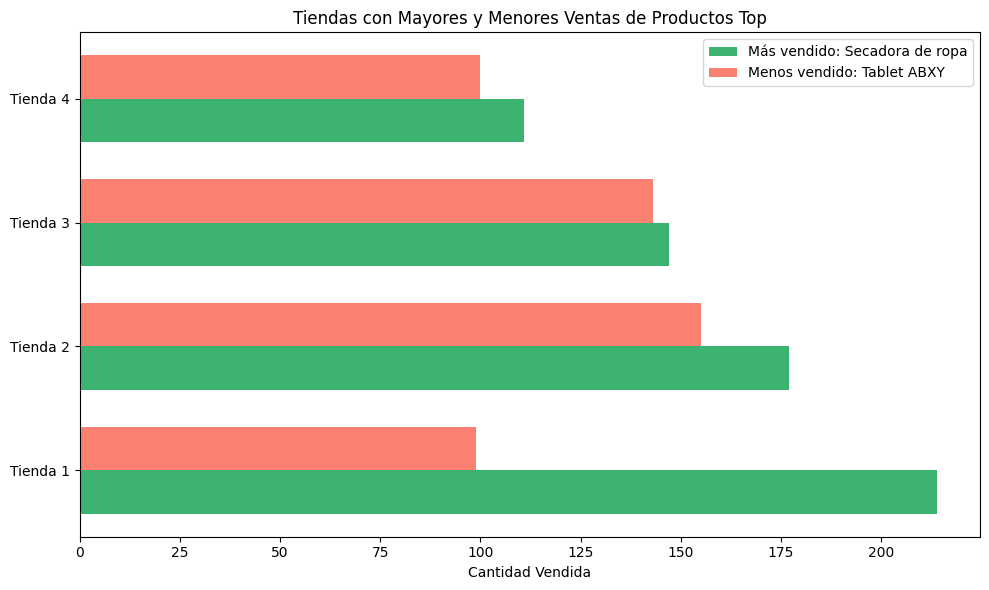

In [65]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
x = np.arange(len(tiendas))

plt.figure(figsize=(10, 6))
ancho = 0.35

# Gráfico
plt.barh(x - ancho/2, ventas_max, height=ancho, label=f'Más vendido: {producto_max}', color='mediumseagreen')
plt.barh(x + ancho/2, ventas_min, height=ancho, label=f'Menos vendido: {producto_min}', color='salmon')

# Etiquetas
plt.xlabel('Cantidad Vendida')
plt.yticks(x, tiendas)
plt.title('Tiendas con Mayores y Menores Ventas de Productos Top')
plt.legend()
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [66]:
# Lista para almacenar promedios por tienda
envio_promedio_por_tienda = []

# Nombres para el gráfico
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Recorrer cada tienda
for url in urls:
    datos = leer_csv(url)
    total_envio = 0
    total_ventas = 0

    for venta in datos:
        envio = float(venta['Costo de envío'])  # <- nombre correcto de la columna
        total_envio += envio
        total_ventas += 1

    promedio_envio = total_envio / total_ventas if total_ventas > 0 else 0
    envio_promedio_por_tienda.append(promedio_envio)


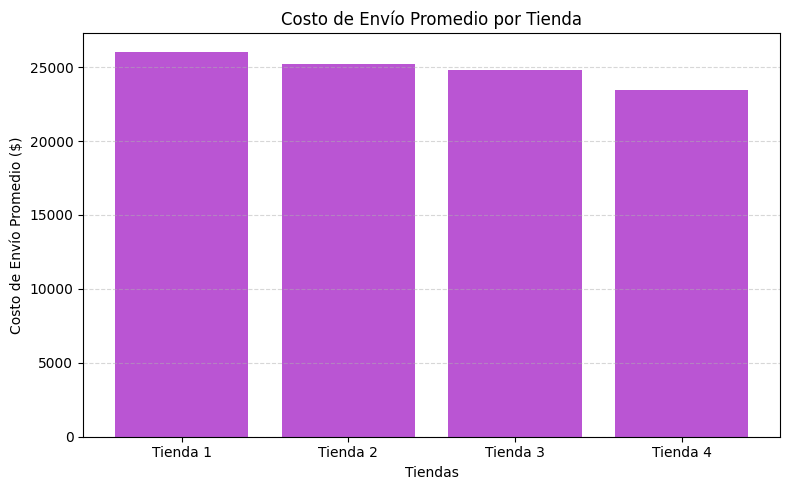

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, envio_promedio_por_tienda, color='mediumorchid')
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio ($)')
plt.title('Costo de Envío Promedio por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd

df_envios = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Envío Promedio ($)': envio_promedio_por_tienda
})

display(df_envios)



,Tienda,Envío Promedio ($)
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


#**Conclusión**

La tienda que tiene menores ventas es la 4, así mismo se suma que su calificación promedio es intermedia, sin embargo en el caso de las ventas por categoría vende menos productos de los que ya de por sí gozan pocas vetas. Aunado a esto, vende menos de los productos que más se venden.

Por lo tanto mi recomendación sería que se venda la tienda 4.